In [1]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.animation import FuncAnimation

In [2]:
# constants
k, c, m = sm.symbols('k, c, m' , positive = True , real = True)

# Variables
t = sm.symbols('t' , positive = True , real = True)

# functions x(t) and F_ext(t)
x = sm.Function('x' , complex = True)(t)
F_ext = sm.Function('F_{ext}' , real = True)(t)

# Derivatives
dx_dt = sm.diff(x , t , 1) # First
ddx_ddt = sm.diff(x , t , 2) # Second

In [3]:
# Equation for damped oscillation
equation = ddx_ddt + (c/m)*dx_dt + (k/m)*x - F_ext
equation

c*Derivative(x(t), t)/m + k*x(t)/m - F_{ext}(t) + Derivative(x(t), (t, 2))

In [4]:
# specifying the initial conditions
init_cond = {x.subs(t , 0) : 0,
             dx_dt.subs(t , 0) : 2}

In [5]:
solution = sm.dsolve(equation , x , ics = init_cond)
solution

Eq(x(t), m*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m))*Integral(F_{ext}(t)*exp(c*t/(2*m))*exp(-t*sqrt(c**2 - 4*k*m)/(2*m)), t)/sqrt(c**2 - 4*k*m) - m*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m))*Integral(F_{ext}(t)*exp(c*t/(2*m))*exp(t*sqrt(c**2 - 4*k*m)/(2*m)), t)/sqrt(c**2 - 4*k*m) + (-m*Integral(F_{ext}(t)*exp(c*t/(2*m))*exp(-t*sqrt(c**2 - 4*k*m)/(2*m)), (t, 0))/sqrt(c**2 - 4*k*m) + 2*m/sqrt(c**2 - 4*k*m))*exp(t*(-c + sqrt(c**2 - 4*k*m))/(2*m)) + (m*Integral(F_{ext}(t)*exp(c*t/(2*m))*exp(t*sqrt(c**2 - 4*k*m)/(2*m)), (t, 0))/sqrt(c**2 - 4*k*m) - 2*m/sqrt(c**2 - 4*k*m))*exp(-t*(c + sqrt(c**2 - 4*k*m))/(2*m)))

In [6]:
# f_ext = 0
new_F_ext = 0
m_val = 2 # kg
k_val = 4 # N.m
c_val = 0.3 # SI unit

# solution after putting constant values
sol_sub = solution.subs([(F_ext , new_F_ext) , (m , m_val) , (k , k_val) , (c , c_val)]).simplify()
sol_sub

Eq(x(t), I*(0.70810325252265 - 0.70810325252265*exp(2.82444684849972*I*t))*exp(-t*(0.075 + 1.41222342424986*I)))

In [7]:
# making expression to vary with t
sol = sol_sub.rhs
solutions = sm.lambdify(t , sol)
solutions

<function _lambdifygenerated(t)>

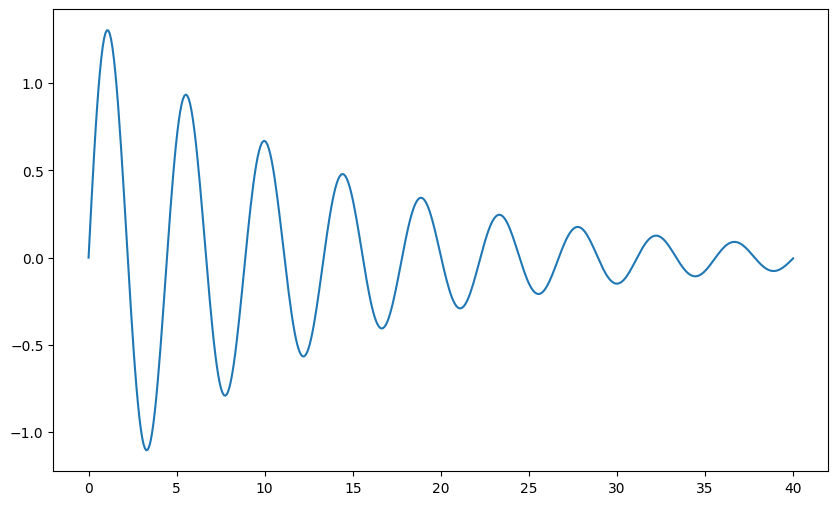

In [9]:
# Display the results
t_var = np.linspace(0 , 40 , 501)

x_var = np.real(solutions(t_var))

fig , ax = plt.subplots(figsize = (10 , 6))

plt.plot(t_var , x_var)